# Importing required libraries

In [82]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Finding directory

In [83]:
pwd

'C:\\Users\\user'

## Loading data

In [84]:
data = pd.read_csv('SampleSuperstore.csv')
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [85]:
data.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


## loading features of data

In [86]:
data.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [87]:
data.shape

(9994, 13)

In [88]:
data.nunique(axis = 0, dropna = True)

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [89]:
data.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


## Generating descriptive statestics

In [91]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


## Finding missing values

In [92]:
data.isna().any()

Ship Mode       False
Segment         False
Country         False
City            False
State           False
Postal Code     False
Region          False
Category        False
Sub-Category    False
Sales           False
Quantity        False
Discount        False
Profit          False
dtype: bool

## Pairwise corelation of columns

In [93]:
data.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,-0.029961,0.479064,0.066253,-0.219487,1.000000


## category vs sales bargraph

Text(0, 0.5, 'Sales')

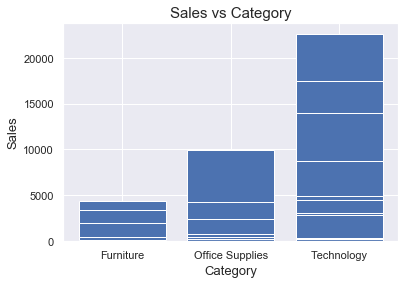

In [94]:
plt.bar('Category','Sales',data=data)
plt.title('Sales vs Category',size= 15)
plt.xlabel('Category',size= 13)
plt.ylabel('Sales',size= 13)

## Quantities ordered by each segment

       Segment  Quantity
0     Consumer     19521
1    Corporate     11608
2  Home Office      6744


Text(0.5, 1.0, 'Quantities ordered by each segment')

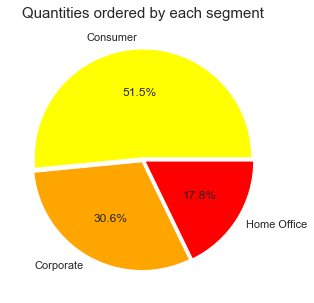

In [95]:
data_group = data.groupby('Segment')['Quantity'].sum().reset_index()
print(data_group)
labels = data['Segment'].unique()
colors = ['yellow', 'orange', 'red']
plt.figure(figsize=(5,5))
plt.pie(data_group['Quantity'],autopct='%1.1f%%',labels=labels,explode=(0.02,0.02,0.02), colors=colors)
plt.title('Quantities ordered by each segment',size= 15)

## Shipping modals

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

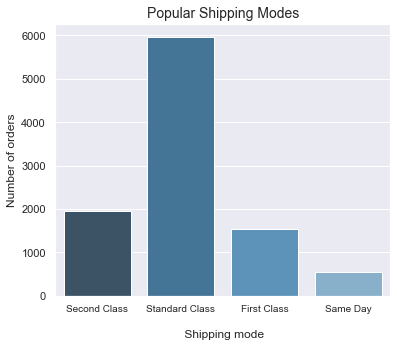

In [103]:
plt.figure(figsize=(6,5))
sns.countplot('Ship Mode',data=data, palette='Blues_d')
plt.title('Popular Shipping Modes',size=14)
plt.xlabel('\n Shipping mode',size=12)
plt.ylabel('Number of orders',size=12)
plt.xticks(fontsize=10)

notice that shipping class has most count,standard delivary will cost less compared to premium for same day

## Shipping mode vs count

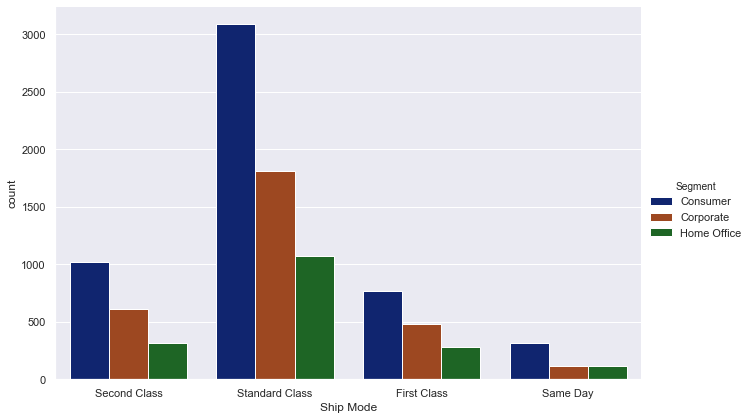

In [104]:
sns.catplot('Ship Mode',data=data,hue='Segment',kind='count',palette='dark',aspect=1.5,height=6)

## State counts of unique values

In [105]:
data['State'].value_counts()


California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Virginia                 224
Arizona                  224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   124
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Mississippi               53
Utah                      53
South Carolina            42
Louisiana                 42
Nevada        

## Cities count

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]),
 <a list of 49 Text xticklabel objects>)

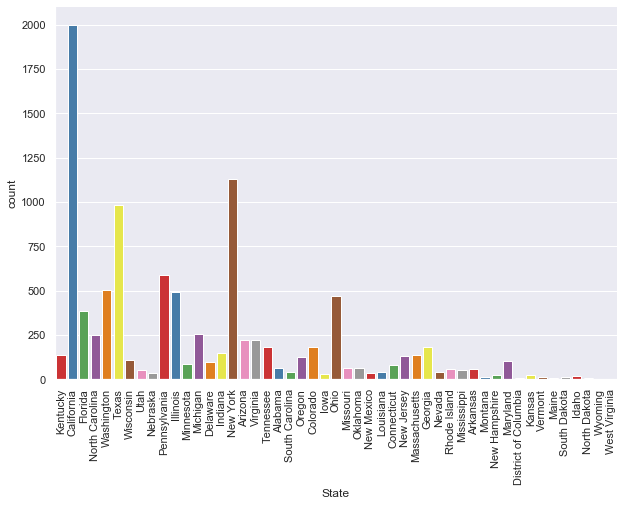

In [106]:
sns.catplot('State',kind='count',data=data,palette='Set1',height=6,aspect=1.5)
plt.xticks(rotation=90)

## Grouping by quantity of cities

In [107]:
datatop10 = data.groupby('City')['Quantity'].sum().reset_index().sort_values(by='Quantity',ascending=True)
datatop10

,City,Quantity
386,Port Orange,1
259,Littleton,1
257,Lindenhurst,1
140,Elyria,1
213,Iowa City,1
...,...,...
452,Seattle,1590
438,San Francisco,1935
374,Philadelphia,1981
266,Los Angeles,2879


In [108]:
datatop10 = datatop10.head(10)
datatop10.reset_index(drop=True,inplace=True)
datatop10

,City,Quantity
0,Port Orange,1
1,Littleton,1
2,Lindenhurst,1
3,Elyria,1
4,Iowa City,1
5,Jupiter,1
6,Keller,2
7,Grand Island,2
8,Baytown,2
9,Holyoke,2


## Region wise orders

    Region  Quantity
0  Central      8780
1     East     10618
2    South      6209
3     West     12266


Text(0.5, 1.0, 'Quantities ordered by each region')

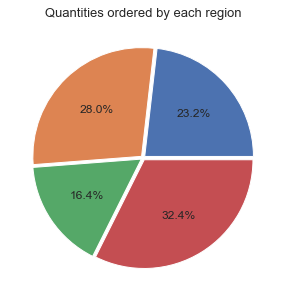

In [109]:
data_region=data.groupby('Region')['Quantity'].sum().reset_index()
print(data_region)

labels = data_region['Region'].unique()
plt.figure(figsize=(5,5))
plt.pie(data_region['Quantity'],autopct='%1.1f%%',explode=(0.02,0.02,0.02,0.02),)
plt.title('Quantities ordered by each region',size=13)

## Highest selling categories

In [110]:
data_cats = data.groupby('Category')['Quantity'].sum().reset_index()
data_cats

,Category,Quantity
0,Furniture,8028
1,Office Supplies,22906
2,Technology,6939


## Distribution of products solid

Text(0.5, 1.0, 'Distribution of products sold')

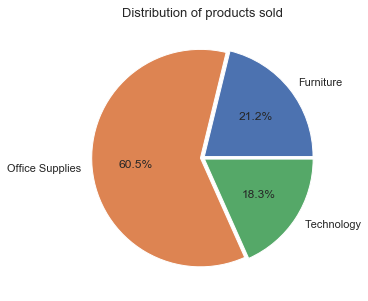

In [111]:
plt.figure(figsize=(5,5))
labels=data_cats['Category'].unique()
plt.pie(data_cats['Quantity'],autopct='%1.1f%%',labels=labels,explode=(0.02,0.02,0.02))

plt.title('Distribution of products sold',size=13)


## Most profitable categories

          Category       Profit
0        Furniture   18451.2728
1  Office Supplies  122490.8008
2       Technology  145454.9481


Text(0.5, 1.0, 'Distribution of profits categorywise')

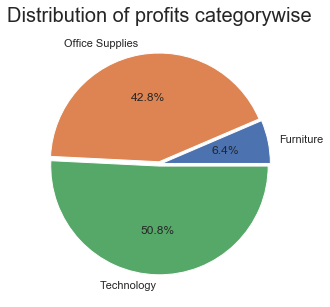

In [112]:
dataprofit = data.groupby('Category')['Profit'].sum().reset_index()
print(dataprofit)
plt.figure(figsize=(5,5))
labels=dataprofit['Category'].unique()
plt.pie(dataprofit['Profit'],autopct='%1.1f%%',labels=labels,explode=(0.02,0.02,0.02))

plt.title('Distribution of profits categorywise',size=20)

## Most profitable products

In [113]:
datatop10_items = data.groupby('Sub-Category')['Profit'].sum().reset_index().sort_values(by='Profit',ascending=False)
datatop10_items.reset_index(drop=True,inplace=True)
datatop10_items=datatop10_items.head(10)
datatop10_items

,Sub-Category,Profit
0,Copiers,55617.8249
1,Phones,44515.7306
2,Accessories,41936.6357
3,Paper,34053.5693
4,Binders,30221.7633
5,Chairs,26590.1663
6,Storage,21278.8264
7,Appliances,18138.0054
8,Furnishings,13059.1436
9,Envelopes,6964.1767


## Visualisation top 10 profitable products

Text(0.5, 8.913124999999994, 'Products')

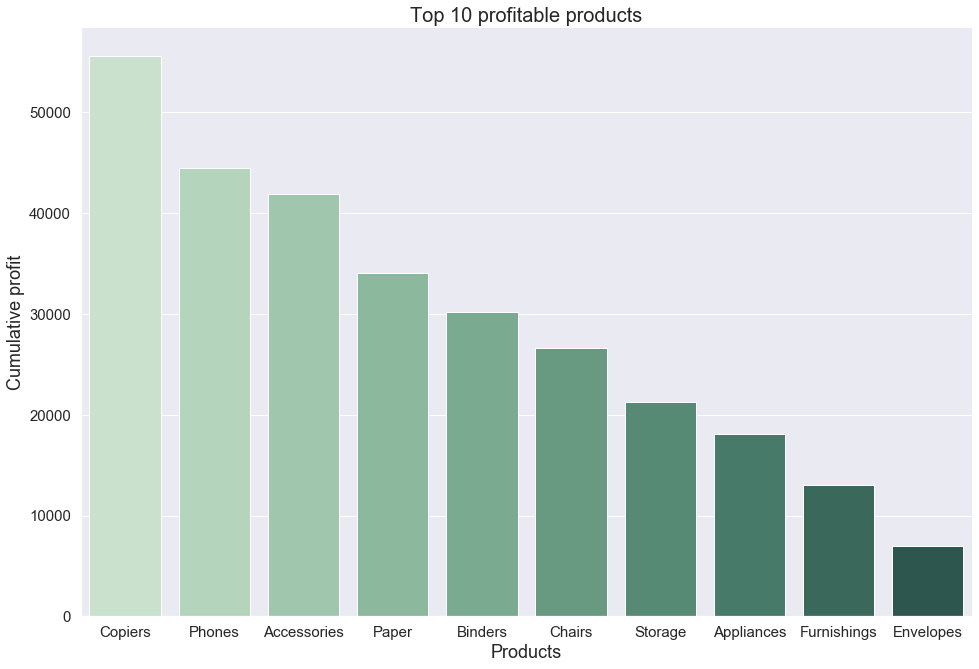

In [114]:
sns.catplot('Sub-Category','Profit',data=datatop10_items,kind='bar',aspect=1.5,height=9,palette='ch:2.5,-.2,dark=.3')
plt.title('Top 10 profitable products',size=20)
plt.xticks(size=15)
plt.yticks(size=15)
plt.ylabel('Cumulative profit',size=18)
plt.xlabel('Products',size=18)

## Top profitable cities

In [115]:
datatop10_cities = data.groupby('City')['Profit'].sum().reset_index().sort_values(by='Profit',ascending=False)
datatop10_cities = datatop10_cities.head(10)
datatop10_cities

,City,Profit
329,New York City,62036.9837
266,Los Angeles,30440.7579
452,Seattle,29156.0967
438,San Francisco,17507.3854
123,Detroit,13181.7908
233,Lafayette,10018.3876
215,Jackson,7581.6828
21,Atlanta,6993.6629
300,Minneapolis,6824.5846
437,San Diego,6377.1960


## Visualisation of top 10 profitable cities

Text(0.5, 8.913125000000022, 'City')

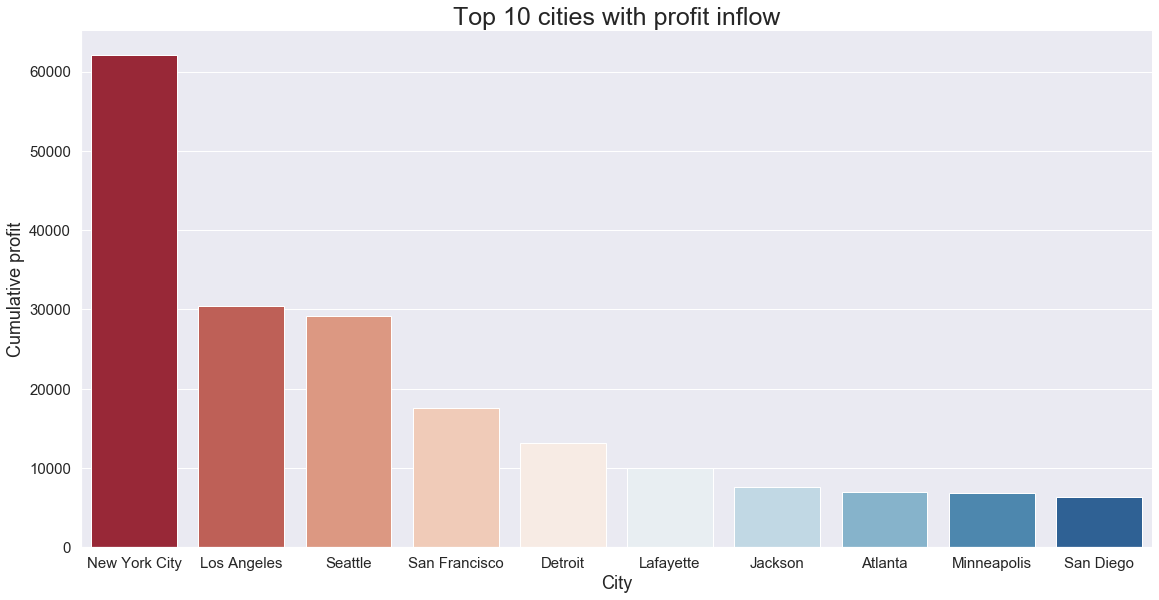

In [116]:
sns.catplot('City','Profit',data=datatop10_cities,kind='bar',aspect=2,height=8,palette='RdBu')
plt.title('Top 10 cities with profit inflow',size=25)
plt.xticks(size=15)
plt.yticks(size=15)
plt.ylabel('Cumulative profit',size=18)
plt.xlabel('City',size=18)

## Conclusion :
    
Data Quality: Good quality data with no need for data preprocessing. No null values in Data set.
    
Sales: 22,97,201
    
Profit: 2,86,397
    
'Standard Class' accounts for the majority of profit.

'HomeOffice' segment generates least sale.

In central region Furniture incures loss.

'West' and 'East' have noticeably more profit.

'Florida', 'Oregon', 'Arizona', 'Illinois', 'Texas', 'Pennsylvania', 'Tennessee', 'North Carlina', 'Colorado' and 'Ohio' have noticeably less Profit.